In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from math import isnan

In [48]:
df = pd.read_excel('/home/rachpt/Documents/Nutstore/data/5月考勤-初步统计.csv')

In [49]:
df.head()

,工号,姓名,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,次数
0,100,徐会姚,NaN,NaN,NaN,NaN,01:51:11\n08:34:11\n13:07:47\n22:33:31,08:24:51\n13:06:56\n22:36:41,08:24:45\n13:13:24\n22:35:31,08:27:45\n13:10:18\n22:34:35,...,00:14:55\n08:34:45\n13:19:02\n23:24:15,08:43:12\n13:07:01\n23:02:11,13:11:39\n22:33:30,NaN,08:17:23\n13:07:59\n22:42:14,08:38:59\n13:53:41\n23:08:41,08:30:17\n13:02:58\n22:34:59,08:28:20\n22:33:18,08:26:40\n13:05:33\n22:37:17,+5
1,101,弥康,NaN,NaN,NaN,23:15:02,08:44:42\n22:33:36,14:00:05\n22:36:49,22:35:27,13:57:24\n22:34:44,...,08:56:11\n13:57:56\n22:31:39,14:00:17\n23:02:02,13:54:12\n22:33:51,08:00:19\n23:19:46,13:54:24\n22:41:28,08:29:55\n13:52:49\n22:46:07,13:41:54\n22:34:54,13:58:35\n22:32:10,13:53:10\n22:37:25,-6
2,102,莫云龙,NaN,NaN,NaN,NaN,01:51:02\n09:05:56\n13:59:09\n22:33:27,13:59:55\n22:36:53,08:29:05\n13:58:37\n22:35:25,08:29:26\n13:58:14\n22:34:38,...,08:59:36\n13:57:50\n23:40:48,09:08:07\n13:58:45\n23:01:13,13:54:08\n22:33:48,22:42:47,13:51:33\n22:40:32,08:27:30\n13:52:10\n22:46:10,08:08:21\n13:56:01\n22:35:12,08:30:38\n13:58:30\n22:32:42,13:26:45\n22:37:20,+1
3,103,赵晓坤,NaN,NaN,NaN,NaN,08:12:01\n14:00:38\n23:07:14,13:50:45\n22:33:19,08:05:04\n13:00:35\n22:30:22,08:10:18\n13:59:54\n22:33:11,...,08:11:59\n13:40:23\n22:30:55,08:17:57\n13:59:02\n22:31:38,NaN,NaN,08:28:19\n13:57:21\n22:31:50,13:46:38\n22:32:44,08:15:28\n13:58:07,13:07:36\n22:31:16,13:04:13,-9
4,104,张益聪,13:56:15\n23:08:39,13:57:43\n23:23:21,13:06:02\n23:21:38,13:09:23\n22:02:42,08:30:37\n13:09:06\n22:40:41,08:31:16\n13:30:56\n23:15:39,09:07:17\n13:04:12\n23:22:18,09:00:14\n13:22:02\n23:40:31,...,08:58:25\n13:01:46\n23:04:25,08:56:08\n13:06:53\n23:10:31,13:47:49\n22:31:58,13:54:12,08:27:36\n13:32:10\n23:01:03,08:55:57\n13:10:03\n22:39:14,08:29:27\n13:11:54\n22:50:20,08:30:50\n13:08:45\n22:39:08,08:13:08\n13:08:57\n22:36:35,+12


In [50]:
str1 = df.iloc[[2]][1].str.split(pat = "\n").tolist()
str1

[nan]

In [51]:
df.shape[0]

82

In [52]:
xx = df.iloc[[2]][1].str.split(pat = "\n").tolist()
xx is not ['nan']

True

In [53]:
df['工号'].max()

160

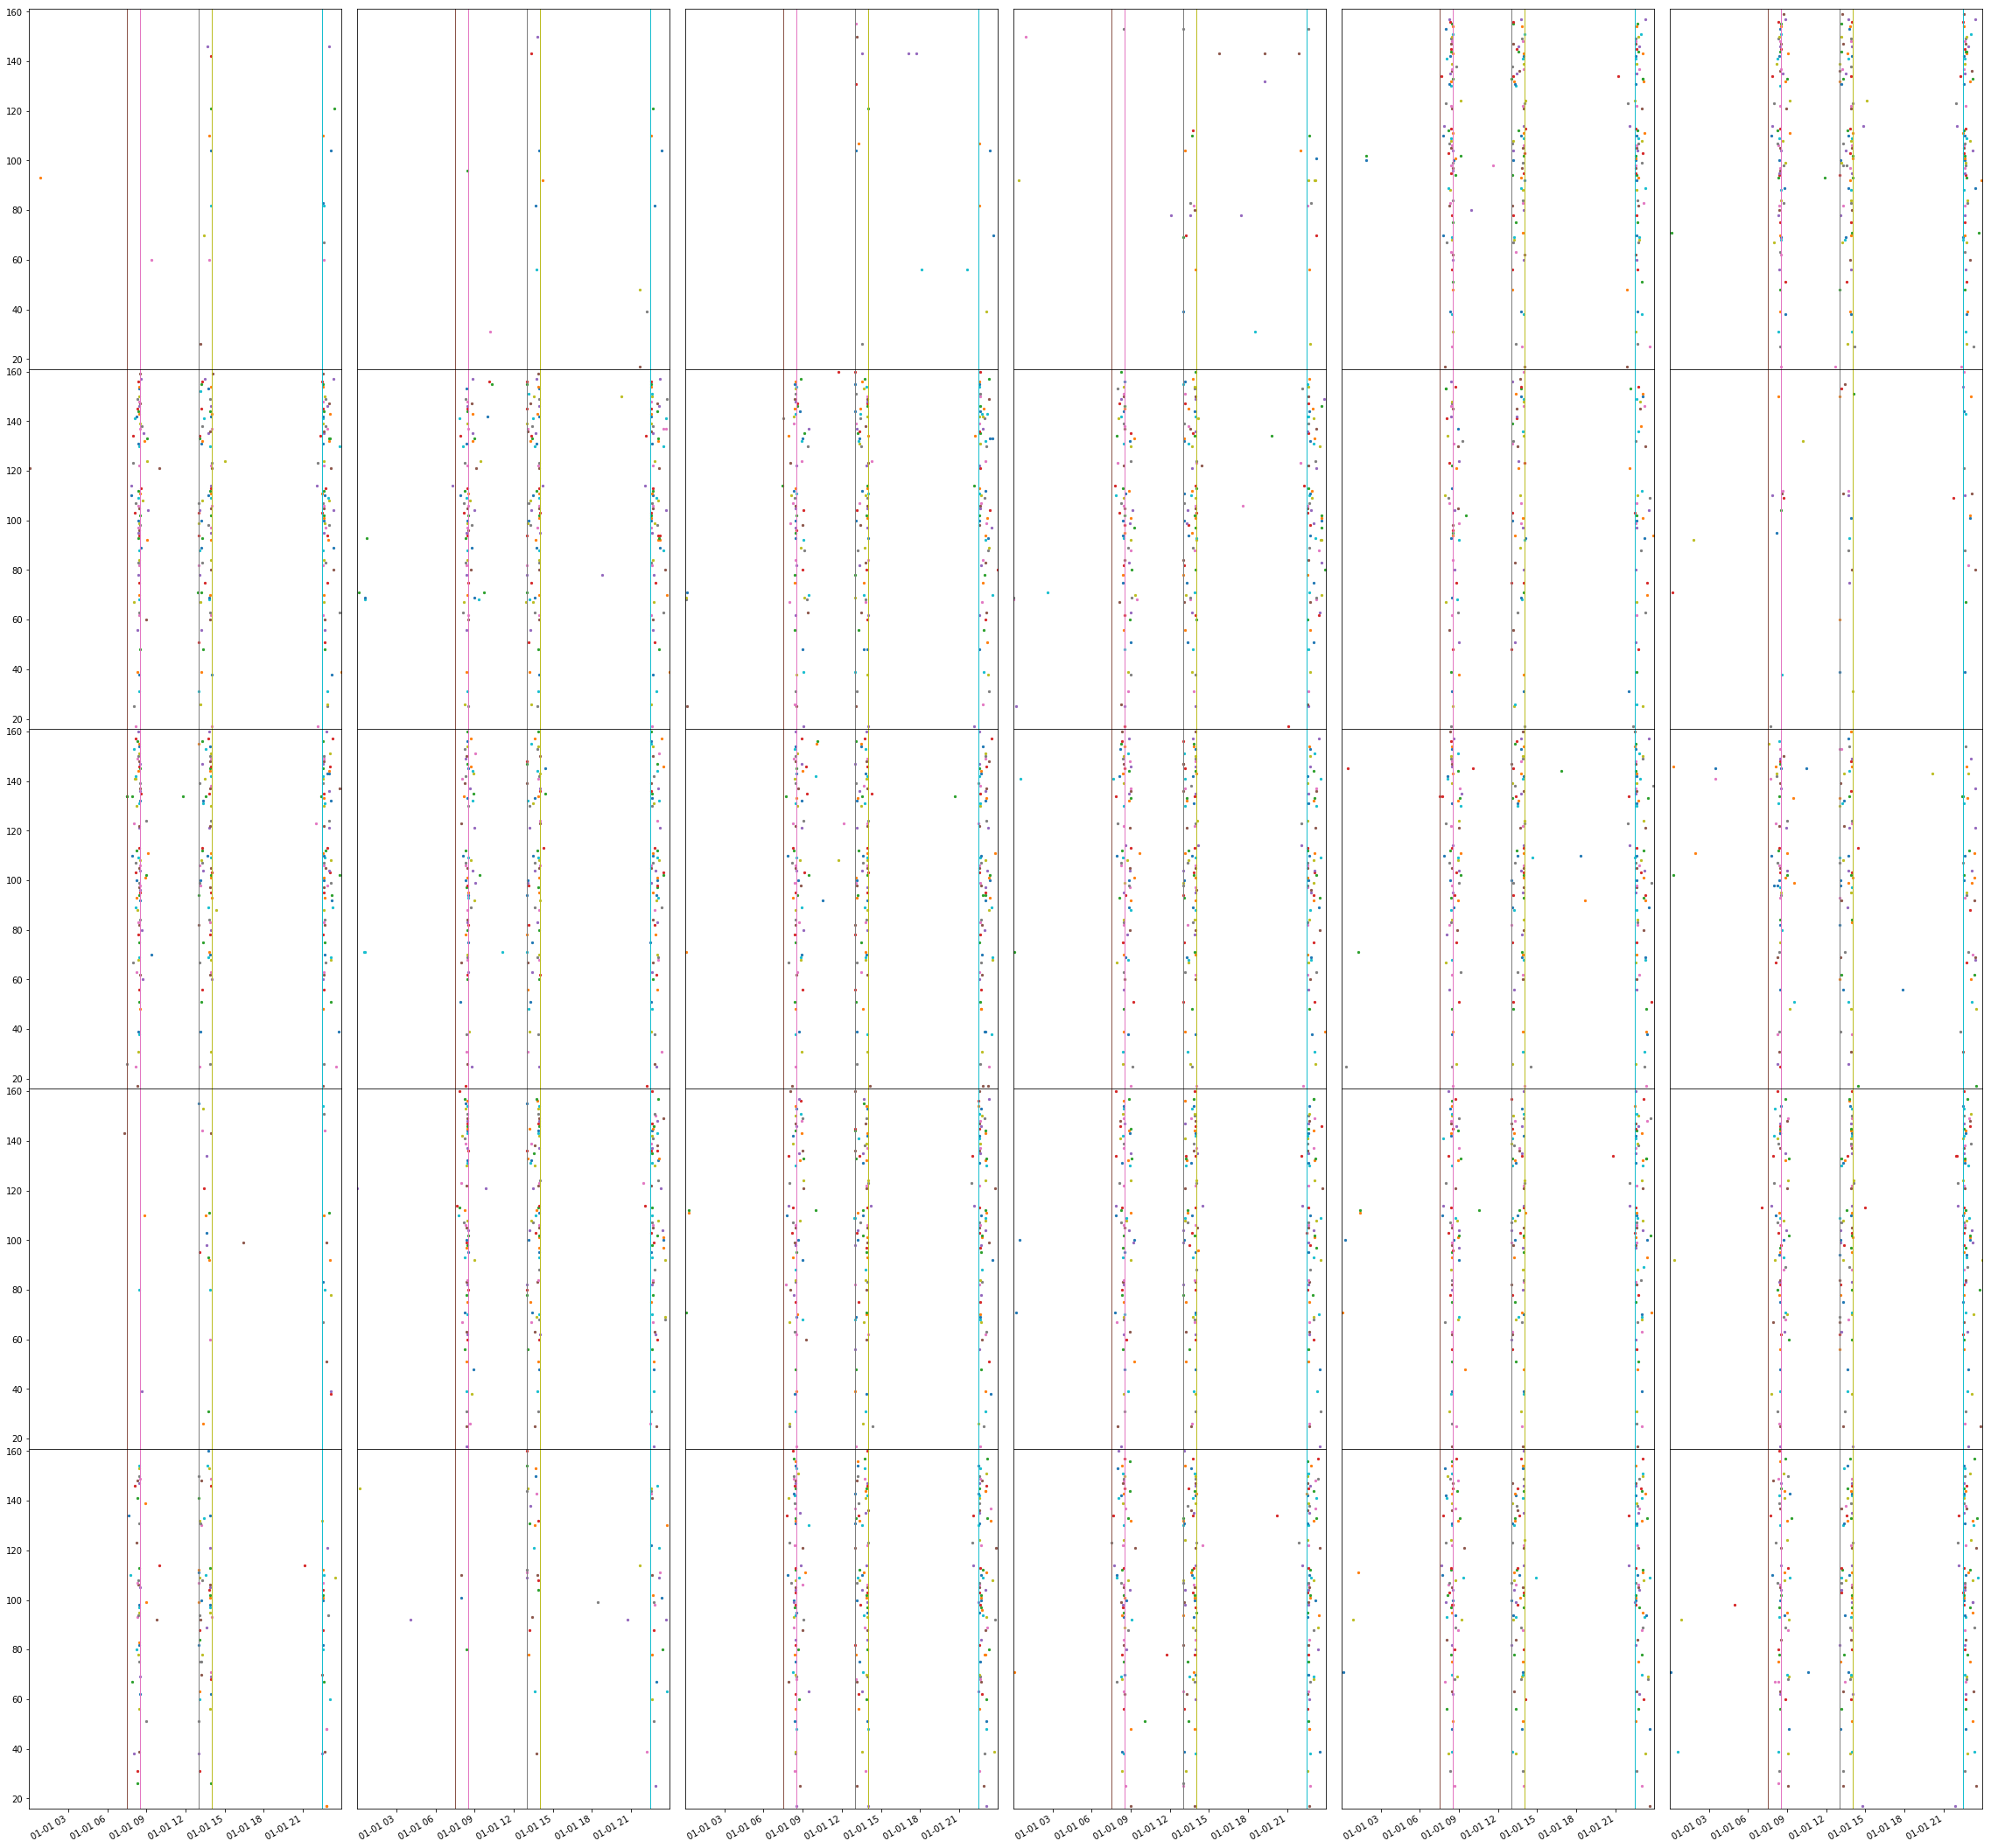

In [54]:
plt.figure(figsize=(40,42))
plt.subplots_adjust(wspace =.05, hspace =0) #调整子图间距
am730 = [datetime.strptime('1900-01-01 07:30:00','%Y-%m-%d %H:%M:%S')] * 2
am830 = [datetime.strptime('1900-01-01 08:30:00','%Y-%m-%d %H:%M:%S')] * 2
pm13  = [datetime.strptime('1900-01-01 13:00:00','%Y-%m-%d %H:%M:%S')] * 2
pm14  = [datetime.strptime('1900-01-01 14:00:00','%Y-%m-%d %H:%M:%S')] * 2
pm22  = [datetime.strptime('1900-01-01 22:30:00','%Y-%m-%d %H:%M:%S')] * 2
lim = [df['工号'].min()-1,df['工号'].max()+1]

for j in range(30):
    day = j+1
    plt.subplot(5,6,day)
    if day % 6 != 1:
        plt.yticks([])
    for i in range(df.shape[0]):
        str1 = df.iloc[[i]][day].str.split(pat = "\n").tolist()[0]
        if type(str1) == list:
            x = pd.to_datetime(str1,format='%H:%M:%S')
            if x is not ['nan']:
                plt.scatter(x,[int(df.iloc[[i]]['工号'])] * len(x),s=5)
                plt.xlim(datetime.strptime('1900-01-01 00:00:01','%Y-%m-%d %H:%M:%S'),
                     datetime.strptime('1900-01-01 23:59:01','%Y-%m-%d %H:%M:%S'))
        plt.ylim(lim)        
        plt.plot(am730,lim,lw=1)
        plt.plot(am830,lim,lw=1)
        plt.plot(pm13,lim,lw=1)
        plt.plot(pm14,lim,lw=1)
        plt.plot(pm22,lim,lw=1)
        plt.gcf().autofmt_xdate()
